In [155]:
import pandas as pd
import numpy as np

g1 = pd.read_pickle('exp2_gfs_pbl1_d3.pk')
g2 = pd.read_pickle('exp2_gfs_pbl2_d3.pk')
g1p = g1.interpolate(limit=99)
g2p = g2.interpolate(limit=99)

In [143]:
def statswrf(infile):
    wrf, obs = infile['w50'], infile['s50']
    forecast_error = obs - wrf
    mobs = obs.mean()
    mwrf = wrf.mean()
    BIAS = (forecast_error).mean()
    MAE = (abs(forecast_error)).mean()
    MSE = ((obs - wrf)**2).mean()    # mean_squared_error(expected, predictions)
    RMSE = (MSE)**.5                                       # sqrt(mean_squared_error)
    #COV = np.cov(obs,wrf)[0,1]
    nn = obs.size+wrf.size-1
    COV = (obs - obs.mean()*(wrf - wrf.mean())).sum()/nn
    print( mobs, mwrf, BIAS, MAE, MSE, RMSE, COV)
       

4.199381227475445 2.554030656814575 1.6303115077211028 2.338458050439147 8.602763023689084 2.9330467135197633 2.019372203224414


In [156]:
statswrf(g1)

4.199381227475445 2.554030656814575 1.6303115077211028 2.338458050439147 8.602763023689084 2.9330467135197633 2.019372203224414


In [144]:
# https://machinelearningmastery.com/time-series-forecasting-performance-measures-with-python/
obs = g1['s200']
wrf = g1['w200']
# forecast_errors = [expected[i]-predictions[i] 
forecast_error = obs - wrf
mobs = obs.mean()
mwrf = wrf.mean()
# BIAS Mean forecast error is calculated as the average of the forecast error values.
# Forecast errors can be positive and negative. This means that when the average of these values is calculated, 
# an ideal mean forecast error would be zero.
# A mean forecast error value other than zero suggests a tendency of the model to over forecast (positive error) 
# or under forecast (negative error). 
# As such, the mean forecast error is also called the forecast bias.

# Mean forecast error is calculated as the average of the forecast error values.
# Mean Forecast Error (or Forecast Bias)
BIAS = (forecast_error).mean()

# The mean absolute error, or MAE, is calculated as the average of the forecast error values, 
# where all of the forecast values are forced to be positive.
MAE = (abs(forecast_error)).mean()
MSE = ((obs - wrf)**2).mean()    # mean_squared_error(expected, predictions)
RMSE = (MSE)**.5                                       # sqrt(mean_squared_error)
COV0 = np.cov(obs,wrf)
nn = obs.size+wrf.size-1
COV = (obs - obs.mean()*(wrf - wrf.mean())).sum()/nn

print( mobs, mwrf, BIAS, MAE, MSE, RMSE, COV)


4.940946174054693 2.4670324325561523 2.427773767375817 2.773516276396507 13.713006650220356 3.703107701677114 2.3622438048475063


In [167]:
def statswrf(model):
    mo500, mo400, mo300, mo200, mo100, mo50, mo30 = model['s500'].mean(), model['s400'].mean(), model['s300'].mean(), \
                                                model['s200'].mean(), model['s100'].mean(), model['s50'].mean(), model['s30'].mean()
    mw500, mw400, mw300, mw200, mw100, mw50, mw30 = model['w500'].mean(), model['w400'].mean(), model['w300'].mean(), \
                                                model['w200'].mean(), model['w100'].mean(), model['w50'].mean(), model['w30'].mean()
    e500, e400, e300, e200, e100, e50, e30 = model['s500']-model['w500'], model['s400']-model['w400'], model['s300']-model['w300'], \
         model['s200']-model['w200'], model['s100']-model['w100'], model['s50']-model['w50'], model['s30']-model['w30']
    b500, b400, b300, b200, b100, b50, b30 = e500.mean(), e400.mean(), e300.mean(), e200.mean(),  \
                                         e100.mean(),  e50.mean(),  e30.mean()
    mae500, mae400, mae300, mae200, mae100, mae50, mae30 = abs(e500).mean(), abs(e400).mean(), abs(e300).mean(), \
                                       abs(e200).mean(),  abs(e100).mean(),  abs(e50).mean(),  abs(e30).mean()
    mse500, mse400, mse300, mse200, mse100, mse50, mse30 = (e500**2).mean(), (e400**2).mean(), (e300**2).mean(), \
                                       (e200**2).mean(),  (e100**2).mean(),  (e50**2).mean(),  (e30**2).mean()
    rmse500, rmse400, rmse300, rmse200, rmse100, rmse50, rmse30 = mse500**.5, mse400**.5, mse300**.5, \
                                                              mse200**.5, mse100**.5, mse50**.5, mse30**.5
    cov500, cov400, cov300, cov200, cov100, cov50, cov30 = np.cov(model['s500'], model['w500']), np.cov(model['s400'], model['w400']), \
                                                       np.cov(model['s300'], model['w300']), np.cov(model['s200'], model['w200']), \
                                                       np.cov(model['s100'], model['w100']), np.cov(model['s50'], model['w50']), \
                                                       np.cov(model['s30'], model['w30'])
    corr500, corr400, corr300, corr200, corr100, corr50, corr30 = np.corrcoef(model['s500'], model['w500']), np.corrcoef(model['s400'], model['w400']), \
                                                       np.corrcoef(model['s300'], model['w300']), np.corrcoef(model['s200'], model['w200']), \
                                                       np.corrcoef(model['s100'], model['w100']), np.corrcoef(model['s50'], model['w50']), \
                                                       np.corrcoef(model['s30'], model['w30'])
    labels = ['Altura', 'Mean OBS', 'Mean WRF', 'BIAS', 'MAE', 'RMSE', 'COV', 'R']
    stats = [('500m', mo500, mw500, b500, mae500, rmse500, cov500[0,1], corr500[0,1]),
         ('400m', mo400, mw400, b400, mae400, rmse400, cov400[0,1], corr500[0,1]),
         ('300m', mo300, mw300, b300, mae300, rmse300, cov300[0,1], corr300[0,1]),
         ('200m', mo200, mw200, b200, mae200, rmse200, cov200[0,1], corr200[0,1]),
         ('100m', mo100, mw100, b100, mae100, rmse100, cov100[0,1], corr100[0,1]),
         ('50m', mo50, mw50, b50, mae50, rmse50, cov50[0,1], corr50[0,1]),
         ('30m', mo30, mw30, b30, mae30, rmse30, cov30[0,1], corr30[0,1])]
    model = pd.DataFrame.from_records(stats, columns=labels)
    return model

In [170]:
statswrf(g2p)

,Altura,Mean OBS,Mean WRF,BIAS,MAE,RMSE,COV,R
0,500m,5.537,2.505,3.032,3.346,3.710,1.008,0.309
1,400m,5.151,2.602,2.548,2.968,3.637,2.101,0.309
2,300m,4.749,2.764,1.984,2.559,3.506,4.103,0.537
3,200m,4.941,2.992,1.949,2.416,3.290,4.864,0.608
4,100m,4.707,2.951,1.756,2.400,3.218,3.897,0.551
5,50m,4.199,2.843,1.357,2.039,2.642,2.981,0.577
6,30m,4.025,2.799,1.226,1.708,2.240,2.578,0.612


In [146]:
mo500, mo400, mo300, mo200, mo100, mo50, mo30 = g1p['s500'].mean(), g1p['s400'].mean(), g1p['s300'].mean(), \
                                                g1p['s200'].mean(), g1p['s100'].mean(), g1p['s50'].mean(), g1p['s30'].mean()
mw500, mw400, mw300, mw200, mw100, mw50, mw30 = g1p['w500'].mean(), g1p['w400'].mean(), g1p['w300'].mean(), \
                                                g1p['w200'].mean(), g1p['w100'].mean(), g1p['w50'].mean(), g1p['w30'].mean()
e500, e400, e300, e200, e100, e50, e30 = g1p['s500']-g1p['w500'], g1p['s400']-g1p['w400'], g1p['s300']-g1p['w300'], \
         g1p['s200']-g1p['w200'], g1p['s100']-g1p['w100'], g1p['s50']-g1p['w50'], g1p['s30']-g1p['w30']
b500, b400, b300, b200, b100, b50, b30 = e500.mean(), e400.mean(), e300.mean(), e200.mean(),  \
                                         e100.mean(),  e50.mean(),  e30.mean()
mae500, mae400, mae300, mae200, mae100, mae50, mae30 = abs(e500).mean(), abs(e400).mean(), abs(e300).mean(), \
                                       abs(e200).mean(),  abs(e100).mean(),  abs(e50).mean(),  abs(e30).mean()
mse500, mse400, mse300, mse200, mse100, mse50, mse30 = (e500**2).mean(), (e400**2).mean(), (e300**2).mean(), \
                                       (e200**2).mean(),  (e100**2).mean(),  (e50**2).mean(),  (e30**2).mean()
rmse500, rmse400, rmse300, rmse200, rmse100, rmse50, rmse30 = mse500**.5, mse400**.5, mse300**.5, \
                                                              mse200**.5, mse100**.5, mse50**.5, mse30**.5
cov500, cov400, cov300, cov200, cov100, cov50, cov30 = np.cov(g1p['s500'], g1p['w500']), np.cov(g1p['s400'], g1p['w400']), \
                                                       np.cov(g1p['s300'], g1p['w300']), np.cov(g1p['s200'], g1p['w200']), \
                                                       np.cov(g1p['s100'], g1p['w100']), np.cov(g1p['s50'], g1p['w50']), \
                                                       np.cov(g1p['s30'], g1p['w30'])
corr500, corr400, corr300, corr200, corr100, corr50, corr30 = np.corrcoef(g1p['s500'], g1p['w500']), np.corrcoef(g1p['s400'], g1p['w400']), \
                                                       np.corrcoef(g1p['s300'], g1p['w300']), np.corrcoef(g1p['s200'], g1p['w200']), \
                                                       np.corrcoef(g1p['s100'], g1p['w100']), np.corrcoef(g1p['s50'], g1p['w50']), \
                                                       np.corrcoef(g1p['s30'], g1p['w30'])
labels = ['Altura', 'Mean OBS', 'Mean WRF', 'BIAS', 'MAE', 'RMSE', 'COV', 'R']
stats = [('500m', mo500, mw500, b500, mae500, rmse500, cov500[0,1], corr500[0,1]),
         ('400m', mo400, mw400, b400, mae400, rmse400, cov400[0,1], corr500[0,1]),
         ('300m', mo300, mw300, b300, mae300, rmse300, cov300[0,1], corr300[0,1]),
         ('200m', mo200, mw200, b200, mae200, rmse200, cov200[0,1], corr200[0,1]),
         ('100m', mo100, mw100, b100, mae100, rmse100, cov100[0,1], corr100[0,1]),
         ('50m', mo50, mw50, b50, mae50, rmse50, cov50[0,1], corr50[0,1]),
         ('30m', mo30, mw30, b30, mae30, rmse30, cov30[0,1], corr30[0,1])]
dfg1 = pd.DataFrame.from_records(stats, columns=labels)


In [147]:
mo500, mo400, mo300, mo200, mo100, mo50, mo30 = g2p['s500'].mean(), g2p['s400'].mean(), g2p['s300'].mean(), \
                                                g2p['s200'].mean(), g2p['s100'].mean(), g2p['s50'].mean(), g2p['s30'].mean()
mw500, mw400, mw300, mw200, mw100, mw50, mw30 = g2p['w500'].mean(), g2p['w400'].mean(), g2p['w300'].mean(), \
                                                g2p['w200'].mean(), g2p['w100'].mean(), g2p['w50'].mean(), g2p['w30'].mean()
e500, e400, e300, e200, e100, e50, e30 = g2p['s500']-g2p['w500'], g2p['s400']-g2p['w400'], g2p['s300']-g2p['w300'], \
         g2p['s200']-g2p['w200'], g2p['s100']-g2p['w100'], g2p['s50']-g2p['w50'], g2p['s30']-g2p['w30']
b500, b400, b300, b200, b100, b50, b30 = e500.mean(), e400.mean(), e300.mean(), e200.mean(),  \
                                         e100.mean(),  e50.mean(),  e30.mean()
mae500, mae400, mae300, mae200, mae100, mae50, mae30 = abs(e500).mean(), abs(e400).mean(), abs(e300).mean(), \
                                       abs(e200).mean(),  abs(e100).mean(),  abs(e50).mean(),  abs(e30).mean()
mse500, mse400, mse300, mse200, mse100, mse50, mse30 = (e500**2).mean(), (e400**2).mean(), (e300**2).mean(), \
                                       (e200**2).mean(),  (e100**2).mean(),  (e50**2).mean(),  (e30**2).mean()
rmse500, rmse400, rmse300, rmse200, rmse100, rmse50, rmse30 = mse500**.5, mse400**.5, mse300**.5, \
                                                              mse200**.5, mse100**.5, mse50**.5, mse30**.5
cov500, cov400, cov300, cov200, cov100, cov50, cov30 = np.cov(g2p['s500'], g2p['w500']), np.cov(g2p['s400'], g2p['w400']), \
                                                       np.cov(g2p['s300'], g2p['w300']), np.cov(g2p['s200'], g2p['w200']), \
                                                       np.cov(g2p['s100'], g2p['w100']), np.cov(g2p['s50'], g2p['w50']), \
                                                       np.cov(g2p['s30'], g2p['w30'])
corr500, corr400, corr300, corr200, corr100, corr50, corr30 = np.corrcoef(g2p['s500'], g2p['w500']), np.corrcoef(g2p['s400'], g2p['w400']), \
                                                       np.corrcoef(g2p['s300'], g2p['w300']), np.corrcoef(g2p['s200'], g2p['w200']), \
                                                       np.corrcoef(g2p['s100'], g2p['w100']), np.corrcoef(g2p['s50'], g2p['w50']), \
                                                       np.corrcoef(g2p['s30'], g2p['w30'])
labels = ['Altura', 'Mean OBS', 'Mean WRF', 'BIAS', 'MAE', 'RMSE', 'COV', 'R']
stats = [('500m', mo500, mw500, b500, mae500, rmse500, cov500[0,1], corr500[0,1]),
         ('400m', mo400, mw400, b400, mae400, rmse400, cov400[0,1], corr500[0,1]),
         ('300m', mo300, mw300, b300, mae300, rmse300, cov300[0,1], corr300[0,1]),
         ('200m', mo200, mw200, b200, mae200, rmse200, cov200[0,1], corr200[0,1]),
         ('100m', mo100, mw100, b100, mae100, rmse100, cov100[0,1], corr100[0,1]),
         ('50m', mo50, mw50, b50, mae50, rmse50, cov50[0,1], corr50[0,1]),
         ('30m', mo30, mw30, b30, mae30, rmse30, cov30[0,1], corr30[0,1])]
dfg2 = pd.DataFrame.from_records(stats, columns=labels)
pd.set_option('display.precision',3)


In [148]:
dfg1

,Altura,Mean OBS,Mean WRF,BIAS,MAE,RMSE,COV,R
0,500m,5.537,2.361,3.176,3.411,3.796,0.671,0.236
1,400m,5.151,2.363,2.787,3.118,3.817,1.542,0.236
2,300m,4.749,2.384,2.365,2.814,3.847,3.005,0.458
3,200m,4.941,2.451,2.490,2.824,3.734,3.818,0.545
4,100m,4.707,2.631,2.076,2.714,3.457,3.418,0.515
5,50m,4.199,2.532,1.667,2.356,2.949,2.408,0.492
6,30m,4.025,2.493,1.532,2.044,2.557,2.061,0.519


In [149]:
dfg2

,Altura,Mean OBS,Mean WRF,BIAS,MAE,RMSE,COV,R
0,500m,5.537,2.505,3.032,3.346,3.710,1.008,0.309
1,400m,5.151,2.602,2.548,2.968,3.637,2.101,0.309
2,300m,4.749,2.764,1.984,2.559,3.506,4.103,0.537
3,200m,4.941,2.992,1.949,2.416,3.290,4.864,0.608
4,100m,4.707,2.951,1.756,2.400,3.218,3.897,0.551
5,50m,4.199,2.843,1.357,2.039,2.642,2.981,0.577
6,30m,4.025,2.799,1.226,1.708,2.240,2.578,0.612


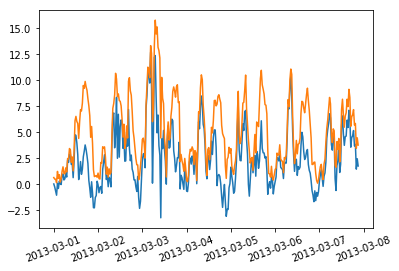

In [124]:
import matplotlib.pyplot as plt
plt.plot(e200)
plt.plot(g2p['s200'])
plt.xticks(rotation=20)
plt.show()

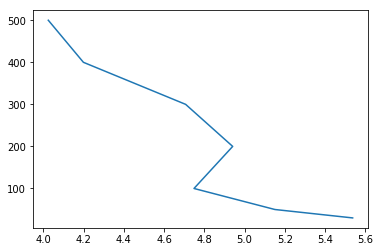

In [154]:
import matplotlib.pyplot as plt
plt.plot(dfg2['Mean OBS'], [30, 50, 100, 200, 300, 400, 500])
plt.show()